In [36]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # This is different
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam                        # This is different
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image                    # This is different 
#import pandas as pd

In [37]:
# Define paths to training, validation, and testing directories
train_dir = 'D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\Pneumonia X Ray\\chest_xray\\train'
val_dir = 'D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\Pneumonia X Ray\\chest_xray\\val'
test_dir = 'D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\Pneumonia X Ray\\chest_xray\\test'

In [38]:
# Set up data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Scale pixel values to the range [0, 1]
    shear_range=0.2,           # Randomly apply shear transformations
    zoom_range=0.2,            # Randomly zoom into images
    horizontal_flip=True       # Randomly flip images horizontally
)

#What: We create a train_datagen object for processing training images, which includes rescaling and augmentations.
#Why: Rescaling (scaling pixel values to [0, 1]) is necessary to normalize data and make it easier for the model to learn. Augmentation (shear, zoom, flip) creates variations of images to make the model more robust and reduce overfitting.

# Only rescale validation images (no data augmentation for validation)
val_datagen = ImageDataGenerator(rescale=1./255)

#What: We create a val_datagen object to process validation images with only rescaling (no augmentations).
#Why: Validation data should represent real data the model hasn't seen, so we don’t add random transformations here—only rescaling for normalization.

# Set up a data generator for testing images, applying only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
# Load training images from directory, applying transformations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),    # Resize images to 150x150 pixels
    batch_size=16,             # Process images in batches of 32
    class_mode='binary'        # Set class mode to binary (for binary classification)
)

#What: train_generator loads and processes images from train_dir with the transformations defined in train_datagen.
#Why: Setting target_size resizes images to 150x150, so they all have the same size for the model. batch_size allows processing images in groups of 32, which speeds up training. class_mode='binary' tells the generator it’s a binary classification problem (e.g., pneumonia vs. no pneumonia).

Found 1547 images belonging to 2 classes.


In [40]:
# Load validation images from directory, only rescaling
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),    # Resize images to 150x150 pixels
    batch_size=16,             # Process images in batches of 32
    class_mode='binary'        # Set class mode to binary (for binary classification)
)

#What: val_generator loads validation images from val_dir, applying only the rescaling transformations defined in val_datagen.
#Why: We need validation images to assess the model’s performance during training without additional augmentations, ensuring it generalizes well to new data.

Found 16 images belonging to 2 classes.


In [41]:
# Load test images from directory using the generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),      # Resize images to match training size
    batch_size=16,               # Process images in batches of 32
    class_mode='binary'          # Binary classification
)

Found 484 images belonging to 2 classes.


In [42]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model using Sequential and list syntax
model = Sequential([
    Input(shape=(128, 128, 3)),           # Input layer for 150x150 images with 3 color channels
    Conv2D(32, (3, 3), activation='relu'),  # First Conv layer with 32 filters
    MaxPooling2D((2, 2)),                  # First Max Pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Second Conv layer with 64 filters
    MaxPooling2D((2, 2)),                  # Second Max Pooling layer
    Conv2D(128, (3, 3), activation='relu'), # Third Conv layer with 128 filters
    MaxPooling2D((2, 2)),                  # Third Max Pooling layer
    Flatten(),                             # Flattening for Dense layers
    Dense(128, activation='relu'),         # Dense layer with 128 units
    Dropout(0.5),
    Dense(1, activation='sigmoid')         # Output layer with 1 unit for binary classification
])


In [43]:
# Compile the model to specify the optimizer, loss function, and metric
model.compile(
    optimizer=Adam(),               # Adam optimizer, good for most deep learning tasks
    loss='binary_crossentropy',     # Binary cross-entropy loss for binary classification
    metrics=['accuracy']            # Track accuracy during training
)

In [44]:
# Train the model on the training data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of steps per epoch
    epochs=15,                         # Number of times to go through the entire training set
    validation_data=val_generator,    # Validate on separate validation data
    validation_steps=val_generator.samples // val_generator.batch_size,  # Number of validation steps
    verbose=2
)

Epoch 1/15
96/96 - 63s - 654ms/step - accuracy: 0.6982 - loss: 0.5628 - val_accuracy: 0.8750 - val_loss: 0.4434
Epoch 2/15
96/96 - 0s - 3ms/step - accuracy: 0.8750 - loss: 0.3575
Epoch 3/15
96/96 - 58s - 604ms/step - accuracy: 0.8426 - loss: 0.3764 - val_accuracy: 0.8125 - val_loss: 0.4073
Epoch 4/15
96/96 - 0s - 3ms/step - accuracy: 1.0000 - loss: 0.1313
Epoch 5/15
96/96 - 58s - 608ms/step - accuracy: 0.8687 - loss: 0.3214 - val_accuracy: 0.8750 - val_loss: 0.3037
Epoch 6/15
96/96 - 0s - 2ms/step - accuracy: 0.7500 - loss: 0.4143
Epoch 7/15
96/96 - 58s - 602ms/step - accuracy: 0.8935 - loss: 0.2699 - val_accuracy: 0.8750 - val_loss: 0.2775
Epoch 8/15
96/96 - 0s - 2ms/step - accuracy: 0.9375 - loss: 0.1872
Epoch 9/15
96/96 - 59s - 619ms/step - accuracy: 0.8805 - loss: 0.2955 - val_accuracy: 0.9375 - val_loss: 0.2609
Epoch 10/15
96/96 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.1276
Epoch 11/15
96/96 - 58s - 607ms/step - accuracy: 0.8975 - loss: 0.2696 - val_accuracy: 0.9375 - val_loss

In [45]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 0.8779 - loss: 0.3331
Test accuracy: 0.8863636255264282
Test Loss: 0.30606091022491455


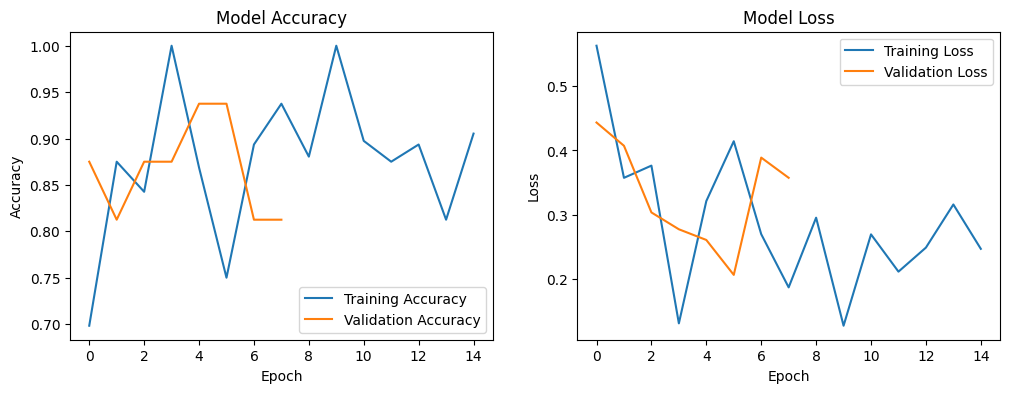

In [46]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')


plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


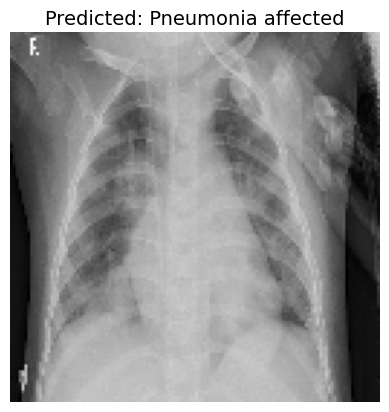

In [48]:
# Define the image path
img_path = 'D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\Pneumonia X Ray\\train\\PNEUMONIA\\person9_bacteria_38.jpeg'

# Load, resize, and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0                  # Convert to array and rescale
img_array = np.expand_dims(img_array, axis=0)                # Add batch dimension

# Make a prediction
prediction = model.predict(img_array)

# Interpret the prediction as a label
predicted_label = "Pneumonia affected" if prediction[0] > 0.5 else "Normal"

# Display the image with the predicted label
plt.imshow(image.img_to_array(img) / 255.0)  # Display the original image in normalized form
plt.axis('off')                              # Hide the axis
plt.title(f'Predicted: {predicted_label}', fontsize=14)
plt.show()


In [13]:
#Summary of each step
#Build the Model: We build a CNN model to recognize patterns in images using layers that specialize in detecting edges, shapes, and textures.
#Compile the Model: Compiling sets up the model to use an optimizer, a loss function for measuring error, and accuracy as the evaluation metric.
#Train the Model: We use the training and validation generators to train the model for 8 epochs, optimizing it to predict pneumonia or normal cases.
#Evaluate the Model: Testing the model on separate data ensures that it performs well on unseen images.
#Display Sample Images: Visualizing a few training images with labels provides an idea of the data and helps us verify image preprocessing.
#Single Image Prediction: Finally, we load a single image, preprocess it, and use the trained model to predict if it shows pneumonia or is normal, providing a real-world use case for the model.